In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

init_vprinting()

<img src="elastic_pendulum_sketch.png" alt="elastic_pendulum" width=300>

An elastic or spring pendulum features a mass attached to a spring which is attached to a stationary pivot point. The spring is assumed to be massless and obeys Hooke's law. This means that the force exerted by the spring is proportional to the displacement of the mass from its equilibrium position, by a constant $k$ called the spring constant; $k$ decided the stiffness of the spring. As an equation, Hooke's law is written as:

$$
F = -kx
$$

where the negative sign indicates that the force exerted will be towards the equilibrium position. There are multiple postions of equilibrium for the spring itself, which lie on an arc whose radius is the spring's natural length. We will call this length $\ell_0$, where no force is exerted on the spring. However, this is only one point on the arc where the force due to gravity is also $0$, which will be our equilibrium position for the pendulum. The force due to gravity is given by:

$$
F = mg
$$

where $m$ is the mass of the and $g$ is the acceleration due to gravity, which we will state as $9.81 ~ ms^{-1}$. While we have discussed our elastic pendulum in terms of forces, we will disregard them as this system is quite a bit more complex than the simple pendulum. Even the simple pendulum had tension as a force of constraint, limiting the motion of the mass to an arc. It had one degree of freedom, meaning that there is one parameter of the system that may vary independently of other parameters. That parameter was the angle $\theta$ between the pendulum and the vertical. The elastic pendulum has two degrees of freedom, the angle $\theta$ and the displacement $x$ of the mass from the equilibrium position as the spring stretches or compresses. This means that we will need two equations to describe the motion of the elastic pendulum. Additionally, the force of tension is still present.

We wil will use the Lagrangian method to derive the equations of motion for the elastic pendulum, which uses the energy of the system instead of the forces acting on it. The Lagrangian is defined as:

$$
\mathcal{L} = T - V
$$

where $T$ is the kinetic energy of the system and $V$ is the potential energy of the system. Before we can calculate the energies of the system, we need to be able to express our mass in terms of coordinates. We will use the Cartesian coordinate system, which means that we need to express the position of the mass in terms of $x$ and $y$. The mass and the spring will form a right triangle with the vertical, containing an angle $\theta$. We can thus use trigonometry to get the y and x components of the position vector $\vec{r}$:

$$
x_{m} = (\ell_0 + x) \sin(\theta)  ~~~~~~~~~~~~~~~~~~~~~~~ y_{m} = - (\ell_0 + x) cos(\theta)
$$

where $x_m$ and $y_m$ are the x and y components of the position vector $\vec{r}$, respectively. We can also get the time derivatives of these components:

$$
\dot{x}_{m} = (\ell_0 + x) \dot{\theta} \cos(\theta) + \dot{x} \sin(\theta) ~~~~~~~~~~~~~~~~~~~~~~~ \dot{y}_{m} = (\ell_0 + x) \dot{\theta} \sin(\theta) - \dot{x} \cos(\theta)
$$

Those were pretty simple, but python makes these calculations an instantanious process. Now, we can calculate the kinetic energy of the system wit the following equation:

$$
T = \frac{1}{2} m v^2
$$

Note that $v$ is the magnitude of the velocity vector $\vec{v}$. We know that the velocity vector is the time derivative of the position vector, and that $|\vec{r}| = \sqrt{x^2 + y^2}$. The components of $\vec{v}$ are the the time derivatives of the components of $\vec{r}$. Therefore, the magnitude of $\vec{v}$ is:

$$
|\vec{v}| = \sqrt{\dot{x}^2 + \dot{y}^2}
$$

The kinetic energy of the system is thus:

$$
T = \frac{1}{2} m (\dot{x}^2 + \dot{y}^2)
$$

The potential energy has two components, as there is both the gravitational force and an elastic force. The gravitational potential energy is:

$$
V_g = mgh = mgy_m
$$

as the height of the mass is also its y position. We also have the elastic potential energy, which is given by:

$$
V_k = \frac{1}{2} kx^2
$$

The total potential energy is the sum of these two components:

$$
V = mgy_m + \frac{1}{2} kx^2
$$

With our kinetic and potential energies, we can now calculate the Lagrangian, $\mathcal{L}$:

$$
\mathcal{L} = \frac{1}{2} m (\dot{x}^2 + \dot{y}^2) - mgy_m - \frac{1}{2} kx^2
$$

In [44]:
# Create symbolic variables
m, k, ell_0, g, t = sp.symbols('m k ell_0 g t')
omega_0 = sp.symbols('omega_0') # (sqrt(k/m)) - natural angular frequency
x, theta = dynamicsymbols('x theta')

# Define x_m and y_m
x_m = (ell_0 + x)*sp.sin(theta)
y_m = -(ell_0 + x)*sp.cos(theta)

# Derivatives of x_m and y_m
x_m_dot = sp.diff(x_m, t)
y_m_dot = sp.diff(y_m, t)

# Derivatives of x, theta
x_dot = sp.diff(x, t)
x_ddot = sp.diff(x_dot, t)

theta_dot = sp.diff(theta, t)
theta_ddot = sp.diff(theta_dot, t)

# Lagrangian
T = sp.Rational(1, 2) * m * (x_m_dot**2 + y_m_dot**2)


V_g = m * g * y_m
V_k = sp.Rational(1, 2) * k * x**2

V = V_g + V_k


L = T - V


In [8]:
print('Lagrangian:')
L.simplify()

Lagrangian:


$$
p_{\theta} = \dfrac{\partial \mathcal{L}}{\partial \dot \theta}
$$

In [10]:
# Canonical momentum
p_theta = sp.diff(L, theta_dot)

In [11]:
p_theta.simplify()

### Euler-Lagrange Equations

$$
\dfrac{d}{dt} \left( \dfrac{\partial \mathcal{L}}{\partial \dot q_i} \right) - \dfrac{\partial \mathcal{L}}{\partial q_i} = 0
$$

$$
\big \Downarrow
$$

$$
\dfrac{d}{dt} \bigg( \dfrac{\partial \mathcal{L}}{\partial \dot \theta} \bigg) - \dfrac{\partial \mathcal{L}}{\partial \theta} = 0
\implies
\dfrac{d p_{\theta}}{dt} - \dfrac{\partial \mathcal{L}}{\partial \theta} = 0
$$

$$
\dfrac{d}{dt} \left( \dfrac{\partial \mathcal{L}}{\partial \dot x} \right) - \dfrac{\partial \mathcal{L}}{\partial x} = 0
$$

In [16]:
# Euler-Lagrange Equations
eq1 = sp.Eq(sp.diff(p_theta, t) - sp.diff(L, theta), 0).simplify()
eq2 = sp.Eq(sp.diff(sp.diff(L, x_dot), t) - sp.diff(L, x), 0).simplify()

In [20]:
eq1

In [19]:
eq2

In [45]:
# Solve for x_ddot and theta_ddot
solutions = sp.solve([eq1, eq2], [theta_ddot, x_ddot])

solution1 = solutions[theta_ddot].simplify()
solution2 = solutions[x_ddot].simplify()

solution2 = solution2.replace(-k*x/m, -omega_0**2*x)

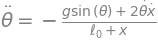

In [46]:
sp.Eq(theta_ddot, solution1)

In [47]:
sp.Eq(x_ddot, solution2)

Now, we have two ODEs. The problem is that these are far too complex to get an exact solution. Instead, we will use numerical methods to approximate the solution to these equations. We can do this with the `solve_ivp` function from the `scipy` library. First, we must decompose the second order ODEs into a system of first order ones. Any second order ODE can be split into two first order ODEs by defining a new variable as the derivative of the original variable:

$$
\dot \theta = \omega ~~~~~~~~~~~~~~~~~~~~~~~ \dot x = v
$$
$$
\ddot \theta = \dot \omega ~~~~~~~~~~~~~~~~~~~~~~~ \ddot x = \dot v
$$

Now we have four first order ODEs:
* $\dot \theta = \omega$
* $\dot x = v$
* $\dot \omega = ...$
* $\dot v = ...$

Now we convert the **symboilc** equations into **numeric** functions with the sympy function `lamdify()`:

In [53]:
omega_dot_f = sp.lambdify((t, g, ell_0, theta, theta_dot, x, x_dot), solution1)
v_dot_f = sp.lambdify((t, g, ell_0, omega_0, theta, theta_dot, x), solution2)
theta_dot_f = sp.lambdify(theta_dot, theta_dot)
x_dot_f = sp.lambdify(x_dot, x_dot)

We must define $\vec S = [\theta, x, \omega, v]$, a vector whose time derivative is $[\dot \theta, \dot x, \dot \omega, \dot v]$, our system of ODEs. To use a differential equation solver, we must define a function that takes $\vec S$ and $t$ as arguments and returns the derivative of $\vec S$ with respect to $t$, $\dfrac{d \vec S}{dt}$ or $\dot{\vec S}$.

In [65]:
def S_dot(t, S, g, ell_0, omega_0):
    theta, x, omega, v = S
    return [
        theta_dot_f(omega),
        x_dot_f(v),
        omega_dot_f(t, g, ell_0, theta, omega, x, v),
        v_dot_f(t, g, ell_0, omega_0, theta, omega, x)
    ]

$$
\dot{\vec S} =
\begin{bmatrix}
\dot \theta \\
\dot x \\
\dot \omega \\
\dot v
\end{bmatrix}
=
\begin{bmatrix}
\omega \\

v \\

- \frac{g \sin{\left(\theta \right)} + 2 \dot{\theta} \dot{x}}{\ell_{0} + x} \\

\ell_{0} \dot{\theta}^{2} + g \cos{\left(\theta \right)} - \omega_{0}^{2} x + x \dot{\theta}^{2} \\

\end{bmatrix}
$$

Now we can solve the system of ODEs with the `solve_ivp()` function from the `scipy.integrate` module. This function takes in a function that returns the derivative of $\vec S$ with respect to $t$, $\dot{\vec S}$, and the initial conditions $\vec S_0$. It also takes in the time span and an array of times to evaluate the solution at. What we get returned is an object that contains the solution to the ODEs at the times we specified.

In [167]:
# Initial conditions
param_g = 9.81 # m s^-2

param_ell_0 = 5 # m

param_m = 2 # kg
param_k = 1 # N m^-1

param_omega_0 = np.sqrt(param_k/param_m) # rad s^-1

parameters = (param_g, param_ell_0, param_omega_0)

theta_0 = np.deg2rad(60) # ° -> rad
x_0 = 4 # m
omega_0 = np.deg2rad(-30) # ° s^-1 -> rad s^-1
v_0 = 0 # m s^-1
S_0 = [theta_0, x_0, omega_0, v_0]

t_0 = 0
t_f = 40
time_frame = [t_0, t_f]
t_eval = np.linspace(t_0, t_f, (t_f - t_0) * 25) # @ 25 fps

sol = solve_ivp(
    S_dot,
    time_frame,
    S_0,
    t_eval=t_eval,
    args=parameters,
)

We can assign the solution object to arrays representing the position, velocity, angle and angular velocity at different points of time. These variables will be $X_{\text array}$, $V_{\text array}$, $\Theta_{\text array}$ and $\Omega_{\text array}$, respectively. We will also asign the time interval used to a time array variable.

In [168]:
Theta_array, X_array, Omega_array, V_array = sol.y
time = sol.t

We can convert $\Theta_{\text array}$ and $\Omega_{\text array}$ from radians to degrees with the `np.rad2deg()` function from the `numpy` library.

In [169]:
Theta_deg_array = np.rad2deg(Theta_array)
Omega_deg_array = np.rad2deg(Omega_array)

Now we can save the data to a csv file with the `np.savetxt()` function from the `numpy` module. We use `np.transpose()` to make the data easier to read by having the columns represent the variables and the rows represent the time intervals.

In [170]:
np.savetxt(
    'elastic_pendulum.csv',
    np.transpose([time, Theta_deg_array, X_array, Omega_deg_array, V_array]),
    delimiter=',',
    header='time,theta,x,omega,v',
)

The block below changes some of the default settings for the pyplot module. Essentially, we are inverting the colour scheme to give it a dark background and light text.

In [171]:
plt.rcParams["axes.facecolor"] = "black"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["axes.titlecolor"] = "white"
plt.rcParams["figure.facecolor"] = "black"
plt.rcParams["legend.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"
plt.rcParams["grid.color"] = "#707070"

Now, let's plot $X_{\text array}$, $V_{\text array}$, $\Theta_{\text array}$ and $\Omega_{\text array}$ against time. We can use the `plt.plot()` function from the `matplotlib.pyplot` module. We will plot these as different subplots in a 2x2 grid with the `plt.subplot()` function, as well as the `gridspec` module.

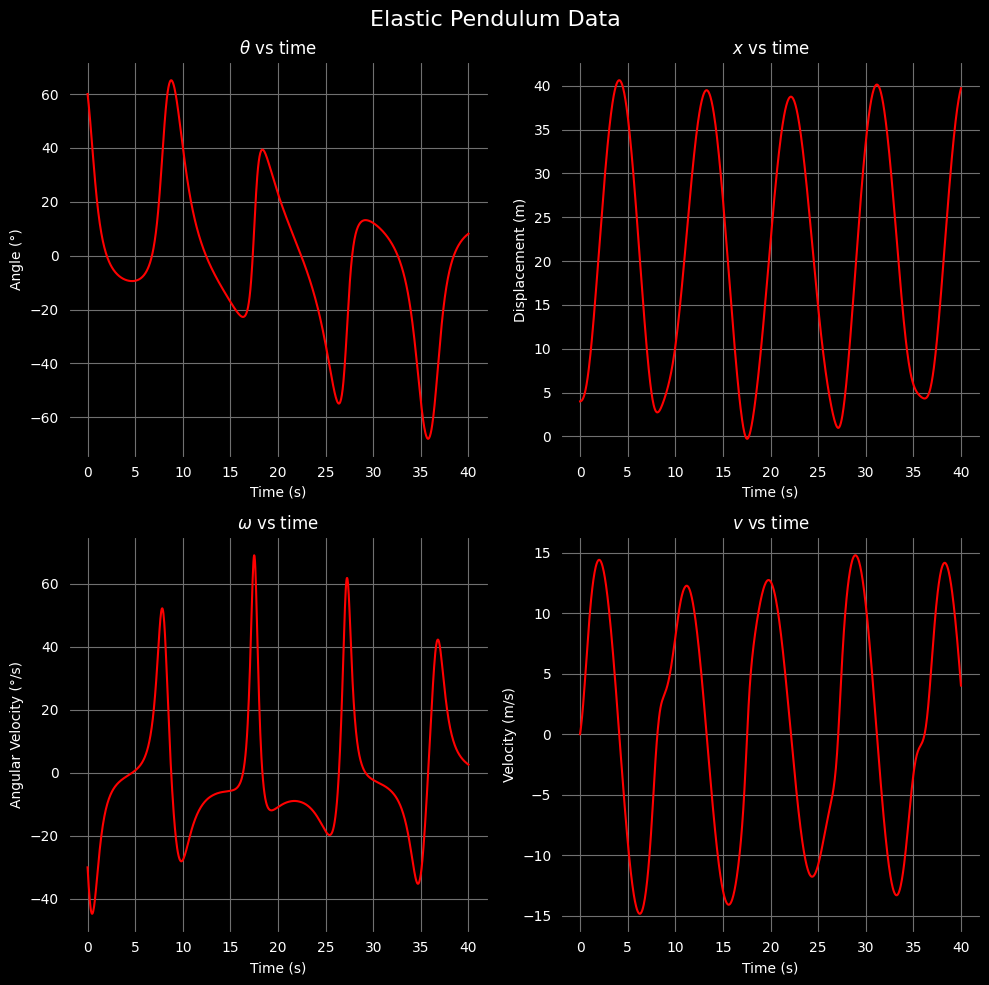

In [172]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Theta_array
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(time, Theta_deg_array, color="#FF0000")
ax1.set_title(r"$\theta$ vs time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Angle (°)")
ax1.grid()

# X_array
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(time, X_array, color="#FF0000")
ax2.set_title(r"$x$ vs time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Displacement (m)")
ax2.grid()

# Omega_array
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(time, Omega_deg_array, color="#FF0000")
ax3.set_title(r"$\omega$ vs time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Angular Velocity (°/s)")
ax3.grid()

# V_array
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(time, V_array, color="#FF0000")
ax4.set_title(r"$v$ vs time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Velocity (m/s)")
ax4.grid()

plt.suptitle("Elastic Pendulum Data", color="white", fontsize=16)

plt.tight_layout()  
plt.savefig("Figures/elastic_pendulum_data.png", dpi=300)
plt.show()

We must define a function that takes in our arrays, as well as the initial conditions, and returns the $x$ and $y$ values of the mass at each point in the time interval. We can use the equations for $x$ and $y$ which we derived earlier to do this. The x and y positions will be returned as arrays for the time interval.

In [173]:
xm_f = sp.lambdify((ell_0, theta, x), x_m)
ym_f = sp.lambdify((ell_0, theta, x), y_m)

In [174]:
def get_coordinates(Theta_array, X_array, param_ell_0):
    return [
        xm_f(param_ell_0, Theta_array, X_array),
        ym_f(param_ell_0, Theta_array, X_array)
    ]
    
Xm_array, Ym_array = get_coordinates(Theta_array, X_array, param_ell_0)

I got this [Spring Function](https://github.com/nrsyed/utilities/tree/master/spring) from the internet. It is a function that takes in a start and end coordinates, as well as the number of nodes and width of a spring. Those are then use to return an array of x values and an array of y values that can be used to plot the string. I have used this function to animate the elastic rod of the pendulum. I had to make the width greater than the length divided by the number of nodes. Otherwise, the formula for the spring would not work and it would default to returning a straight line.

In [175]:
def spring(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.

    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """

    # Check that nodes is at least 1.
    nodes = max(int(nodes), 1)

    # Convert to numpy array to account for inputs of different types/shapes.
    start, end = np.array(start).reshape((2,)), np.array(end).reshape((2,))

    # If both points are coincident, return the x and y coords of one of them.
    if (start == end).all():
        return start[0], start[1]

    # Calculate length of spring (distance between endpoints).
    length = np.linalg.norm(np.subtract(end, start))

    # Calculate unit vectors tangent (u_t) and normal (u_t) to spring.
    u_t = np.subtract(end, start) / length
    u_n = np.array([[0, -1], [1, 0]]).dot(u_t)

    # Initialize array of x (row 0) and y (row 1) coords of the nodes+2 points.
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    # Check that length is not greater than the total length the spring
    # can extend (otherwise, math domain error will result), and compute the
    # normal distance from the centerline of the spring.
    normal_dist = np.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2

    # Compute the coordinates of each point (each node).
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    return spring_coords[0,:], spring_coords[1,:]

C:\Users\Owner\AppData\Local\Temp\ipykernel_8584\4020804966.py:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(Xm_array[i], Ym_array[i])


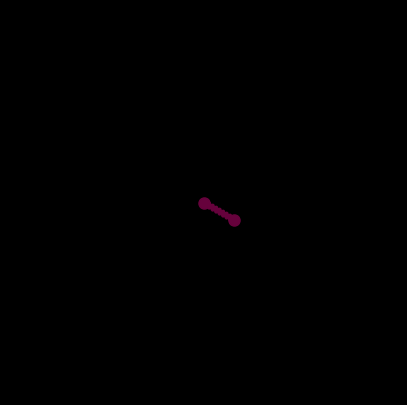

In [176]:
def animate(i):
    
    # Create the spring line, width has to be greater than length/nodes
    nodes_num = 15
    length = np.linalg.norm(np.subtract((Xm_array[i]/nodes_num, Ym_array[i]/nodes_num),
                                        (Xm_array[i] - Xm_array[i]/nodes_num, Ym_array[i] - Ym_array[i]/nodes_num)))
    
    spring_line = spring(
        start=(Xm_array[i]/nodes_num, Ym_array[i]/nodes_num),
        end=(Xm_array[i] - Xm_array[i]/nodes_num, Ym_array[i] - Ym_array[i]/nodes_num),
        nodes=nodes_num,
        width=length/nodes_num + param_ell_0/10
    )
    
    # Create lines to fill the starting and ending gaps
    start_line = (np.array([0, Xm_array[i]/nodes_num]), np.array([0, Ym_array[i]/nodes_num]))
    end_line = (np.array([Xm_array[i] - Xm_array[i]/nodes_num, Xm_array[i]]), np.array([Ym_array[i] - Ym_array[i]/nodes_num, Ym_array[i]]))
    
    # Append the start and end lines to the spring line
    spring_line = (np.append(start_line[0], spring_line[0]), np.append(start_line[1], spring_line[1]))
    spring_line = (np.append(spring_line[0], end_line[0]), np.append(spring_line[1], end_line[1]))
    
    
    # Plot the lines
    ln1.set_data(spring_line[0], spring_line[1])
    
    ln2.set_data(Xm_array[:i], Ym_array[:i])
    
    point.set_data(Xm_array[i], Ym_array[i])
    

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_facecolor("k") # enable this to hide background
ax.get_xaxis().set_ticks([]) # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([]) # enable this to hide y axis ticks


# Plot the line

ln1, = plt.plot([], [], lw=3, markersize=8, color="#66023c", linestyle="-")
ln2, = plt.plot([], [], lw=3, markersize=4, color="red", linestyle="-")
point, = plt.plot([], [], lw=0, markersize=8, color="#66023c", marker="o")
pivot_point, = plt.plot([0], [0], lw=0, markersize=8, color="#66023c", marker="o")


ax.set_xlim(1.1 * - (param_ell_0 + np.max(X_array)), 1.1 * (param_ell_0 + np.max(X_array)))
ax.set_ylim(1.1 * - (param_ell_0 + np.max(X_array)), 1.1 * (param_ell_0 + np.max(X_array)))

ani = animation.FuncAnimation(fig, animate, frames=len(time), interval=50)
ani.save("Animations/elastic_pendulum.gif", writer="pillow", fps=25)